In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv
/kaggle/input/continent/countryContinent.csv
/kaggle/input/conti2/continents2.csv


In [36]:
d = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')

In [75]:
df = d.copy()

# We want to answer this question's visualizations(any matplotlib or seaborn method)
- Global Suicides(per 100K)-trend over time 1985-2016
- Global Suicides(per 100K) by Continent
- Global Suicides(per 100k) by Gender and trend over time 1985-2016
- Population-gdp_per_capita Plot
- Correlation between GDP(per Capita) and suicides per 100k
- Generation hue Gender Counter
- Which age of people suicide a most
- Which generation of people suicide a most

In [38]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [39]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


# Explanation of Features
- Country : Name of the country.
- year : year of suicide (1985 - 2016)
- sex : gender (male / female)
- age : 15-24 years/25-34 years/35-54 years/5-14 years/55-74 years/75+ years
- suicides_no : the raw number of reported suicides
- population : country population
- suicides_100k : suicides_no * 100k / population
- gdp_for_year : total monetary or market value of all final goods and services produced in a country in a given year
- gdp_per_capita : the ratio of real GDP to the average population of a specific year
- generation : Boomers / G.I.Generation / Generation X / Generation Y / Millenials / Silent

In [40]:
df.shape

(27820, 12)

In [41]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [76]:
df = df.rename(columns={'country':'Country' , 'year':'Year' , 'sex':'Sex' , 'age':'Age' ,
                   'suicides_no':'SuicidesNo' , 'population':'Population' , 
                   'suicides/100k pop':'Suicides/100kPop' , 'country-year':'CountryYear' ,
                   'HDI for year':'HDIForYear' , ' gdp_for_year ($) ':'GdpForYear($)', 
                   'gdp_per_capita ($)':'GdpPerCapita','generation':'Generation'})

In [43]:
df.columns

Index(['Country', 'Year', 'Sex', 'Age', 'SuicidesNo', 'Population',
       'Suicides/100kPop', 'CountryYear', 'HDIForYear', 'GdpForYear($)',
       'GdpPerCapita', 'Generation'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           27820 non-null  object 
 1   Year              27820 non-null  int64  
 2   Sex               27820 non-null  object 
 3   Age               27820 non-null  object 
 4   SuicidesNo        27820 non-null  int64  
 5   Population        27820 non-null  int64  
 6   Suicides/100kPop  27820 non-null  float64
 7   CountryYear       27820 non-null  object 
 8   HDIForYear        8364 non-null   float64
 9   GdpForYear($)     27820 non-null  object 
 10  GdpPerCapita      27820 non-null  int64  
 11  Generation        27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [45]:
df.isnull().sum()

Country                 0
Year                    0
Sex                     0
Age                     0
SuicidesNo              0
Population              0
Suicides/100kPop        0
CountryYear             0
HDIForYear          19456
GdpForYear($)           0
GdpPerCapita            0
Generation              0
dtype: int64

In [77]:
df.drop(['HDIForYear','CountryYear'],axis=1,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           27820 non-null  object 
 1   Year              27820 non-null  int64  
 2   Sex               27820 non-null  object 
 3   Age               27820 non-null  object 
 4   SuicidesNo        27820 non-null  int64  
 5   Population        27820 non-null  int64  
 6   Suicides/100kPop  27820 non-null  float64
 7   GdpForYear($)     27820 non-null  object 
 8   GdpPerCapita      27820 non-null  int64  
 9   Generation        27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


# Global Suicides(per 100K)-trend over time 1985-2016

In [48]:
display(df['Suicides/100kPop'].max())
display(df['Suicides/100kPop'].min())

224.97

0.0

In [49]:
unique_year = df['Year'].nunique()
unique_year

32

In [50]:
group_year = df.groupby('Year').sum()
group_year

,SuicidesNo,Population,Suicides/100kPop,GdpPerCapita
Year,,,,
1985,116063,1008600086,6811.89,3508548
1986,120670,1029909613,6579.84,4104636
1987,126842,1095029726,7545.45,5645760
1988,121026,1054094424,7473.13,5870508
1989,160244,1225514347,8036.54,6068424
1990,193361,1466620100,9878.75,7531260
1991,198020,1489988384,10321.06,7782096
1992,211473,1569539447,10528.88,8195232
1993,221565,1530416654,10790.29,8231796


<AxesSubplot:xlabel='Year'>

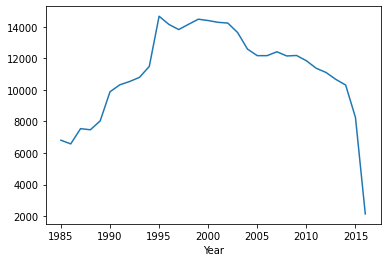

In [51]:
year_suicides = group_year['Suicides/100kPop']
year_suicides.plot()

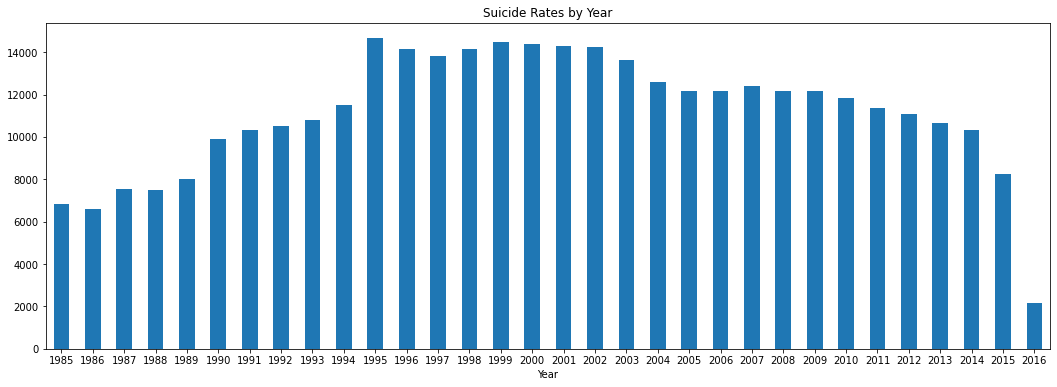

In [52]:
plt.subplots(figsize=(18,6))
group_year['Suicides/100kPop'].plot.bar(rot=0)
plt.title("Suicide Rates by Year");

# Global Suicides(per 100K) by Continent

In [53]:
unique_country = df['Country'].nunique()
unique_country

101

In [54]:
group_country = df.groupby('Country').sum()
group_country

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapita
Country,,,,,
Albania,527796,1970,62325467,924.76,490788
Antigua and Barbuda,647832,11,1990228,179.14,3385212
Argentina,744000,82219,1035985431,3894.59,2944044
Armenia,596832,1905,77348173,976.21,558428
Aruba,336720,101,1259677,1596.52,4069236
...,...,...,...,...,...
United Arab Emirates,144540,622,36502275,94.89,3035664
United Kingdom,744000,136805,1738767780,2790.92,11869908
United States,744000,1034013,8054027201,5140.97,14608296


In [55]:
df_continent2 = pd.read_csv('../input/conti2/continents2.csv')
df_continent2

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [56]:
def find_continent(df1,df2):
    for i in df1.unique():
        if i in df2.unique():
            continue
        else:
            print('MISMATCH',i)
find_continent(df.Country,df_continent2.name)

MISMATCH Bosnia and Herzegovina
MISMATCH Macau
MISMATCH Republic of Korea
MISMATCH Russian Federation
MISMATCH Saint Vincent and Grenadines


In [57]:
df_continent2.loc[df_continent2.name.str.contains("Bosnia"),'name']='Bosnia and Herzegovina'
df_continent2.loc[df_continent2.name.str.contains("Maca"),'name']='Macau'
df_continent2.loc[df_continent2.name.str.contains("Korea, Republic of"),'name']='Republic of Korea'
df_continent2.loc[df_continent2.name.str.contains("Russia"),'name']='Russian Federation'
df_continent2.loc[df_continent2.name.str.contains("Vincent"),'name']='Saint Vincent and Grenadines'
find_continent(df.Country, df_continent2.name)

In [58]:
df3 = df.merge(df_continent2[['name','region']], left_on='Country', right_on='name')
df3

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapita,Generation,name,region
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,Albania,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Albania,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Albania,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,Albania,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,Albania,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,Uzbekistan,Asia
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent,Uzbekistan,Asia
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,Uzbekistan,Asia
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z,Uzbekistan,Asia


In [73]:
print('Unique Values of Features:\n')
for i in ['region','Year']:
    print(f'{i}:\n{sorted(df3[i].unique())}\n')

Unique Values of Features:

region:
['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

Year:
[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]



In [60]:
df3.drop(['name'],axis=1,inplace=True)

In [61]:
df3

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides/100kPop,GdpForYear($),GdpPerCapita,Generation,region
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,Europe
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,Asia
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent,Asia
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,Asia
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z,Asia


In [62]:
group_region = df3.groupby('region').sum()
group_region

,Year,SuicidesNo,Population,Suicides/100kPop,GdpPerCapita
region,,,,,
Africa,1702548,11355,908387666,6445.61,5796148
Americas,18431844,1787619,20755274454,80652.73,86236304
Asia,10742724,1456148,10153989019,58630.99,83248536
Europe,22854012,3408447,18850110084,199576.40,273759116
Oceania,1943880,84851,654397213,11238.10,20184936


<AxesSubplot:xlabel='region'>

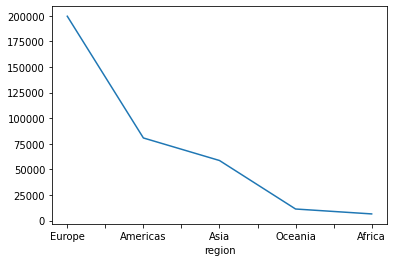

In [63]:
grf2 = group_region['Suicides/100kPop'].sort_values(ascending=False)
grf2.plot()

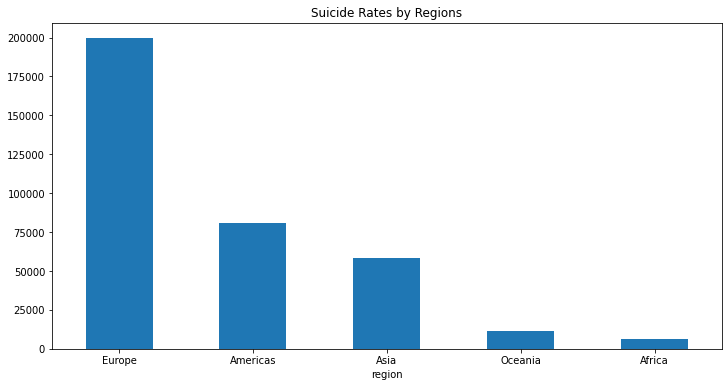

In [84]:
plt.subplots(figsize=(12,6))
group_region['Suicides/100kPop'].sort_values(ascending=False).plot.bar(rot=0)
plt.title("Suicide Rates by Regions");

# Global Suicides(per 100k) by Gender and trend over time 1985-2016

Text(0.5, 1.0, 'Gender vs Suicides')

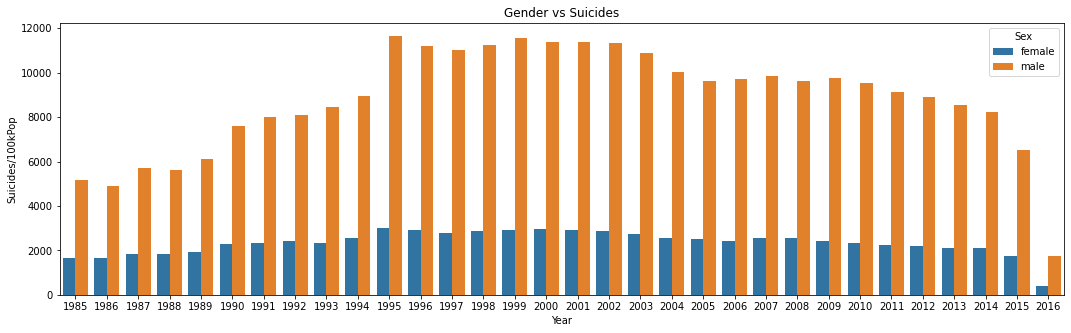

In [65]:
plt.figure(figsize=(18,5))
sns.barplot(x = "Year", y = "Suicides/100kPop", hue = "Sex",data = df3.groupby(["Year","Sex"]).sum().reset_index()).set_title("Gender vs Suicides")
# plt.xticks(rotation = 90)

# Population-gdp_per_capita Plot

In [67]:
def split_gdp(gdp_datas):
    if 251<= gdp_datas <= 12000:
        return "251-12000"
    elif 12001<= gdp_datas <= 24000:
        return "12001-24000"
    elif 24001<= gdp_datas <= 36000:
        return "24001-36000"
    elif 36001<= gdp_datas <= 48000:
        return "36001-48000"
    elif 48001<= gdp_datas <= 60000:
        return "48001-60000"
    elif 60001<= gdp_datas <= 72000:
        return "60001-72000"
    elif 72001<= gdp_datas <= 84000:
        return "72001-84000"
    elif 84001<= gdp_datas <= 96000:
        return "84001-96000"
    elif 96001<= gdp_datas <= 108000:
        return "96001-108000"    
    else:
        return "108001-126352"
df3.GdpPerCapita = df3.GdpPerCapita.apply(split_gdp)

Text(0.5, 1.0, 'Population vs GdpPerCapita')

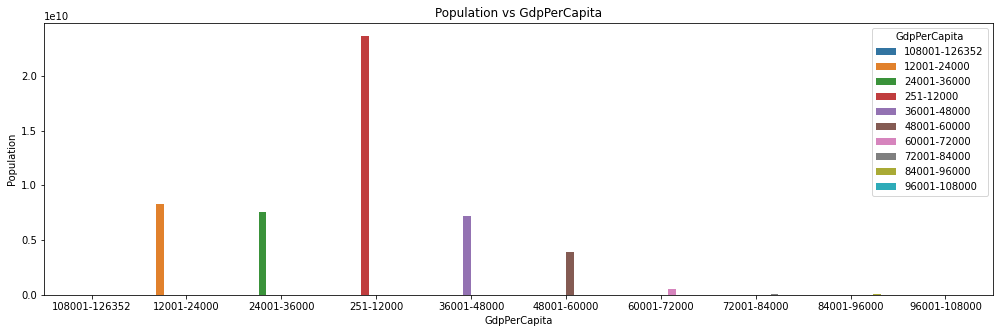

In [72]:
plt.figure(figsize=(17,5))
sns.barplot(x = "GdpPerCapita", y = "Population", hue = "GdpPerCapita",data = df3.groupby(["GdpPerCapita"]).sum().reset_index()).set_title("Population vs GdpPerCapita")
# plt.xticks(rotation = 90)

# Correlation between GDP(per Capita) and suicides per 100k

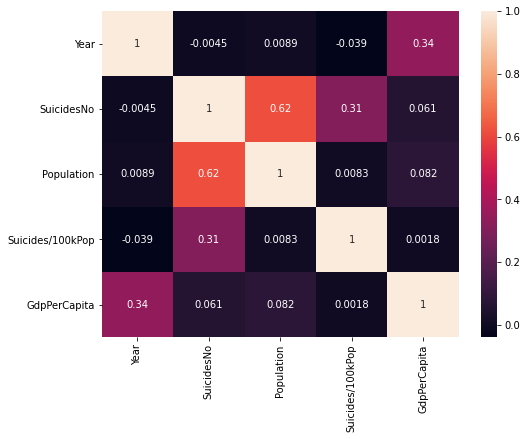

In [81]:
plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot = True);

- GdpPerCapita ile Suicides arasindaki korelasyon 0,0018 yani, yok sayilabilecek kadar az.

# Generation hue Gender Counter

Text(0.5, 1.0, 'Gender vs Suicides')

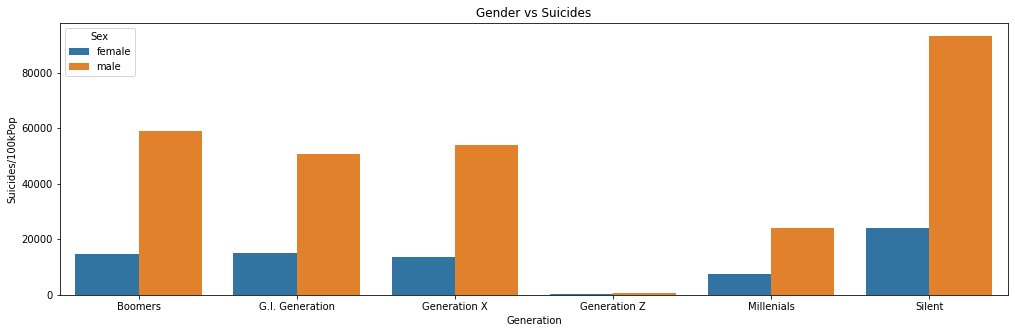

In [89]:
plt.figure(figsize=(17,5))
sns.barplot(x = "Generation", y = "Suicides/100kPop", hue = "Sex",data = df3.groupby(["Generation","Sex"]).sum().reset_index()).set_title("Gender vs Suicides")
# plt.xticks(rotation = 90)

# Which age of people suicide a most

Text(0.5, 1.0, 'Which age of people suicide a most?')

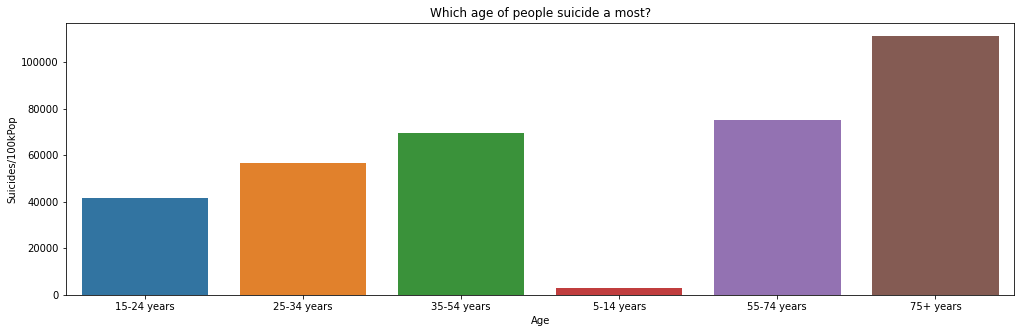

In [92]:
plt.figure(figsize=(17,5))
sns.barplot(x = "Age", y = "Suicides/100kPop", data = df3.groupby(["Age"]).sum().reset_index()).set_title("Which age of people suicide a most?")
# plt.xticks(rotation = 90)

# Which generation of people suicide a most

Text(0.5, 1.0, 'Which age of people suicide a most?')

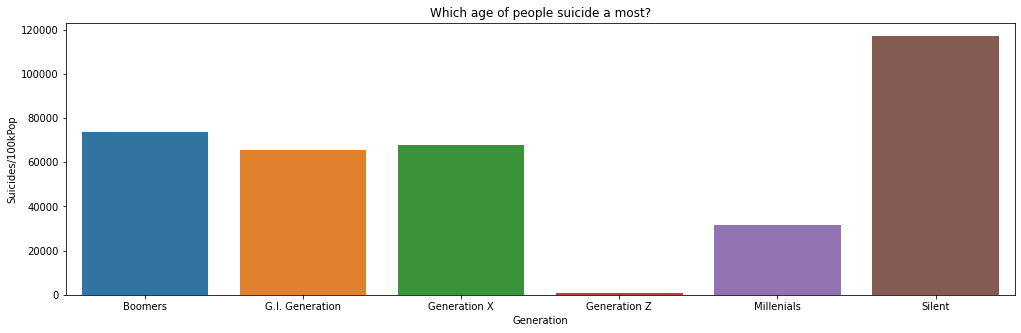

In [98]:
plt.figure(figsize=(17,5))
sns.barplot(x = "Generation", y = "Suicides/100kPop", data = df3.groupby(["Generation"]).sum().reset_index()).set_title("Which age of people suicide a most?")
# plt.xticks(rotation = 90)